In [238]:
# import all libraries
import glob
import os
import time
import pandas as pd
import datetime as dt
import pathlib
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
from pathlib import Path
import qgrid
import numpy as np
import warnings
import warnings
warnings.filterwarnings('ignore')

In [239]:
dir_name = '/Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science'


In [240]:
# get list of all filies only in the given diretory
list_of_files = filter(os.path.isfile, glob.glob(dir_name + '/**/*'))

In [241]:
# sort list of files based on last modification time
list_of_files = sorted(list_of_files, key=os.path.getmtime)

In [242]:
# iterate over sorted list of files and print file path
# along with last modidicaiton date time
for file_path in list_of_files:
    time_stamp_str = time.strftime('%m/%d/%Y :: %H:%M:%S',
                                  time.gmtime(os.path.getmtime(file_path)))
    print(time_stamp_str, ' -->', file_path)

11/18/2020 :: 01:55:44  --> /Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/Bokeh/widgets.py
11/18/2020 :: 23:28:45  --> /Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/Bokeh/widgets_interactive.py
11/19/2020 :: 00:13:59  --> /Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/Bokeh/labels.py
11/22/2020 :: 20:16:56  --> /Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/Bokeh/exercise_8.py
11/22/2020 :: 20:39:04  --> /Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/Bokeh/labels_radio_buttons.py
11/27/2020 :: 23:57:27  --> /Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/Bokeh/filtering_glyphs.py
12/05/2020 :: 19:49:52  --> /Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/Bokeh/bitcoin_streaming_webscrapping.py
12/05/2020 :: 20:26:15  --> /Users/brendan/Library/Mobile D

In [243]:
time_stamp_str

'07/17/2021 :: 19:49:51'

## try 2

In [244]:
dir_name

'/Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science'

In [245]:
filelist = []

In [246]:
for root, dirs, files in os.walk(dir_name):
    for file in files:
        # append the file name to the list
        filelist.append(os.path.join(root,file))
    
# print all the file names
#for name in filelist:
    #print(name)

In [247]:
#type(name)

In [248]:
type(filelist)

list

In [249]:
df = pd.DataFrame(filelist, columns=['FileName'])
df.to_csv('files.csv',index=False)

# sept 4

In [250]:
fname = pathlib.Path(dir_name)

In [251]:
assert fname.exists(), f'No such file: {fname}'

In [252]:
print(fname.stat())

os.stat_result(st_mode=16877, st_ino=287493, st_dev=16777230, st_nlink=13, st_uid=501, st_gid=20, st_size=416, st_atime=1630768979, st_mtime=1630545088, st_ctime=1631747253)


In [253]:
mtime = datetime.datetime.fromtimestamp(fname.stat().st_mtime)
print(mtime)

2021-09-01 21:11:28


In [254]:

root = dir_name
for item in os.listdir(root):
    if not item.startswith('.') and os.path.isfile(os.path.join(root, item)):
        print(item)

files.csv


In [255]:
filesglob = glob.glob('/Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/[!.DS_Store]*')
filesglob

['/Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/Bokeh',
 '/Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/Udemy',
 '/Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/Tableau',
 '/Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/Python',
 '/Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/insty',
 '/Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/13F',
 '/Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/files.csv',
 '/Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/Udemy-BT']

In [256]:
p = Path('/Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science'
).glob('')
p

<generator object Path.glob at 0x7fac98c25d60>

In [257]:
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
       
                
    return allFiles

dirName = dir_name;
# Get the list of all files in directory tree at given path
listOfFiles = getListOfFiles(dirName)
#listOfFiles

In [258]:
d_ext_desc = {'csv':'CSV file',
              'css' : 'CSS Styling',
              'db':'Thumbnail',
              'doc':'Microsoft Word Document',
              'docx':'Microsoft Word Document',
              'GIF':'GIF Image file',
              'html':'HTML file',
              'ico':'Icon Image file',
              'ipynb': 'Jupyter Notebook',
              '.ipynb':'Jupyter',
              'ipynb.icloud': 'Jupyter',
              'html': 'HTML',
              'jpg':'JPG Image file',
              'JPEG':'JPEG Image file',
              'js': 'Javascript',
              'json':'JSON file',
              'lnk':'Shortcut file',
              'msg':'Microsoft Outlook Message file',
              'pdf':'PDF file',
              'pkl':'Pickle (python) file',
              'png':'PNG Image file',
              'ppt':'Microsoft Powerpoint file',
              'pptx':'Microsoft Powerpoint file',
              'pst':'Microsoft Outlook Data file',
              'py':'Python file',
              'pyc':'Python file (compiled)',
              'rtf':'Rich Text Format',
              'svg':'SVG Image file',
              'txt':'Text document',
              'url':'Hyperlink',
              'vsd':'Microsoft Visio file',
              'xls':'Microsoft Excel file',
              'xlsb':'Microsoft Excel file',
              'xlsm':'Microsoft Excel (Macro-enabled) file',
              'xlsx':'Microsoft Excel file',
              'yml':'Requirements file (python)',
              'zip':'ZIP file'}

def ext_desc(ext):
    try:
        desc = d_ext_desc[ext]
    except KeyError:
        desc = ''
    else:
        pass
    return desc


def generate_index(path=None, max=0):
    # stops generating index whenever there are more than 500 records, to test if the script works
    # use 'max=0' to generate the full index
    
    path = dir_name

    df = pd.DataFrame(columns=['File','File Type','Folder Location','Date','Path'])
    for root, _ , files in os.walk(path):
        files = [f for f in files if not f.startswith('~') and f!='Thumbs.db']
        paths = [os.path.join(root, f) for f in files]
        exts = [os.path.splitext(f)[1][1:].lower() for f in files]
        filetypes = [ext_desc(ext) for ext in exts]
        file_links = ['=HYPERLINK("{}","link")'.format(p) if len(p) < 256 else '' for p in paths]
        folders = [os.path.dirname(p) for p in paths]
        time_stamp_str = [time.strftime('%m/%d/%Y :: %H:%M:%S',
                                  time.gmtime(os.path.getmtime(p))) for p in paths]
        df1 = pd.DataFrame({'File': files,
                            'File Type': filetypes,
                            'Folder Location': folders,
                            'Date': time_stamp_str,
                            'Path': paths})
        df = df.append(df1)
        if max and (df.shape[0]>max):
            break
    df = df.reset_index(drop=True)
    return df

In [259]:
raw_df = generate_index(dir_name)
raw_df['File']=raw_df['File'].str.replace('.ipynb.icloud', '.ipynb')
raw_df.loc[raw_df['File'].str.contains('ipynb'), 'File Type'] = 'Jupyter Notebook'
raw_df.head()


,File,File Type,Folder Location,Date,Path
0,.DS_Store,,/Users/brendan/Library/Mobile Documents/com~ap...,09/15/2021 :: 01:08:47,/Users/brendan/Library/Mobile Documents/com~ap...
1,files.csv,CSV file,/Users/brendan/Library/Mobile Documents/com~ap...,09/15/2021 :: 23:07:33,/Users/brendan/Library/Mobile Documents/com~ap...
2,.simple_bokeh.html.icloud,,/Users/brendan/Library/Mobile Documents/com~ap...,11/18/2020 :: 01:55:53,/Users/brendan/Library/Mobile Documents/com~ap...
3,labels.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/19/2020 :: 00:13:59,/Users/brendan/Library/Mobile Documents/com~ap...
4,exercise_8.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/22/2020 :: 20:16:56,/Users/brendan/Library/Mobile Documents/com~ap...


In [260]:
raw_df.shape

(15477, 5)

In [261]:
raw_df['File']=raw_df['File'].str.replace('.ipynb.icloud', '.ipynb')
raw_df.loc[raw_df['File'].str.contains('ipynb'), 'File Type'] = 'Jupyter Notebook'
raw_df.head(7)

,File,File Type,Folder Location,Date,Path
0,.DS_Store,,/Users/brendan/Library/Mobile Documents/com~ap...,09/15/2021 :: 01:08:47,/Users/brendan/Library/Mobile Documents/com~ap...
1,files.csv,CSV file,/Users/brendan/Library/Mobile Documents/com~ap...,09/15/2021 :: 23:07:33,/Users/brendan/Library/Mobile Documents/com~ap...
2,.simple_bokeh.html.icloud,,/Users/brendan/Library/Mobile Documents/com~ap...,11/18/2020 :: 01:55:53,/Users/brendan/Library/Mobile Documents/com~ap...
3,labels.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/19/2020 :: 00:13:59,/Users/brendan/Library/Mobile Documents/com~ap...
4,exercise_8.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/22/2020 :: 20:16:56,/Users/brendan/Library/Mobile Documents/com~ap...
5,.DS_Store,,/Users/brendan/Library/Mobile Documents/com~ap...,09/04/2021 :: 15:11:01,/Users/brendan/Library/Mobile Documents/com~ap...
6,widgets_interactive.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/18/2020 :: 23:28:45,/Users/brendan/Library/Mobile Documents/com~ap...


In [262]:
raw_df.value_counts('Date')

Date
10/26/1985 :: 08:15:00    5449
08/26/2018 :: 00:52:52    1576
09/21/2019 :: 02:56:04     536
08/10/2018 :: 02:01:48     411
09/21/2019 :: 02:56:02     390
                          ... 
07/26/2020 :: 21:25:25       1
07/26/2020 :: 21:24:21       1
07/25/2018 :: 20:35:43       1
07/25/2017 :: 13:41:32       1
12/31/2020 :: 22:09:58       1
Length: 2210, dtype: int64

In [263]:
raw_df.value_counts('File Type')

File Type
                          6624
Javascript                5261
Python file               1085
JSON file                  635
Jupyter Notebook           548
JPG Image file             502
SVG Image file             298
PNG Image file             288
Text document              152
PDF file                    40
Python file (compiled)      14
HTML                        10
Thumbnail                    7
CSS Styling                  6
Icon Image file              4
CSV file                     3
dtype: int64

In [264]:
raw_df.shape

(15477, 5)

In [265]:

qgrid_widget_10_26_85  = qgrid.show_grid(raw_df, show_toolbar = True)
df_10_26_1985_filtered = qgrid_widget_10_26_85.get_changed_df()
df_10_26_1985_filtered.head()


,File,File Type,Folder Location,Date,Path
0,.DS_Store,,/Users/brendan/Library/Mobile Documents/com~ap...,09/15/2021 :: 01:08:47,/Users/brendan/Library/Mobile Documents/com~ap...
1,files.csv,CSV file,/Users/brendan/Library/Mobile Documents/com~ap...,09/15/2021 :: 23:07:33,/Users/brendan/Library/Mobile Documents/com~ap...
2,.simple_bokeh.html.icloud,,/Users/brendan/Library/Mobile Documents/com~ap...,11/18/2020 :: 01:55:53,/Users/brendan/Library/Mobile Documents/com~ap...
3,labels.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/19/2020 :: 00:13:59,/Users/brendan/Library/Mobile Documents/com~ap...
4,exercise_8.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/22/2020 :: 20:16:56,/Users/brendan/Library/Mobile Documents/com~ap...


In [266]:
# filter for all files with the data that matches '10/26/1985 :: 08:15:00'
df_10_26_1985_filtered_vs = raw_df.loc[(raw_df['File Type'] == 'Python file') & 
                                       (raw_df['Date'] == '10/26/1985 :: 08:15:00')]
df_10_26_1985_filtered_jupyter = raw_df.loc[(raw_df['File Type'] == 'Jupyter Notebook') 
                                             & (raw_df['Date'] == '10/26/1985 :: 08:15:00')]
df_10_26_1985_filtered.head(50)

,File,File Type,Folder Location,Date,Path
0,.DS_Store,,/Users/brendan/Library/Mobile Documents/com~ap...,09/15/2021 :: 01:08:47,/Users/brendan/Library/Mobile Documents/com~ap...
1,files.csv,CSV file,/Users/brendan/Library/Mobile Documents/com~ap...,09/15/2021 :: 23:07:33,/Users/brendan/Library/Mobile Documents/com~ap...
2,.simple_bokeh.html.icloud,,/Users/brendan/Library/Mobile Documents/com~ap...,11/18/2020 :: 01:55:53,/Users/brendan/Library/Mobile Documents/com~ap...
3,labels.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/19/2020 :: 00:13:59,/Users/brendan/Library/Mobile Documents/com~ap...
4,exercise_8.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/22/2020 :: 20:16:56,/Users/brendan/Library/Mobile Documents/com~ap...
5,.DS_Store,,/Users/brendan/Library/Mobile Documents/com~ap...,09/04/2021 :: 15:11:01,/Users/brendan/Library/Mobile Documents/com~ap...
6,widgets_interactive.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/18/2020 :: 23:28:45,/Users/brendan/Library/Mobile Documents/com~ap...
7,filtering_glyphs.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/27/2020 :: 23:57:27,/Users/brendan/Library/Mobile Documents/com~ap...
8,widgets.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/18/2020 :: 01:55:44,/Users/brendan/Library/Mobile Documents/com~ap...
9,.Untitled.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,12/05/2020 :: 20:01:10,/Users/brendan/Library/Mobile Documents/com~ap...


In [267]:
df_10_26_1985_filtered_jupyter = raw_df.loc[(raw_df['File Type'] == 'Jupyter Notebook') & (raw_df['Date'] == '10/26/1985 :: 08:15:00')]
df_10_26_1985_filtered_jupyter

,File,File Type,Folder Location,Date,Path


In [268]:
df_10_26_1985_filtered_vs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 8307 to 14289
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   File             147 non-null    object
 1   File Type        147 non-null    object
 2   Folder Location  147 non-null    object
 3   Date             147 non-null    object
 4   Path             147 non-null    object
dtypes: object(5)
memory usage: 6.9+ KB


In [269]:
# filter for all files with the data that matches '08/26/2018 :: 00:52:52'
df_8_26_2018_filtered_vs = raw_df.loc[(raw_df['File Type'] == 'Python file') & 
                                       (raw_df['Date'] == '08/26/2018 :: 00:52:52')]
df_8_26_2018_filtered_jupyter = raw_df.loc[(raw_df['File Type'] == 'Jupyter Notebook') 
                                             & (raw_df['Date'] == '08/26/2018 :: 00:52:52')]
df_8_26_2018_filtered_vs.head()


,File,File Type,Folder Location,Date,Path


In [270]:
df_8_26_2018_filtered_jupyter.head()

,File,File Type,Folder Location,Date,Path


In [271]:
'08/10/2018 :: 02:01:48'

'08/10/2018 :: 02:01:48'

In [272]:
# filter for all files with the data that matches '08/10/2018 :: 02:01:48'
df_8_10_2018_filtered_vs = raw_df.loc[(raw_df['File Type'] == 'Python file') & 
                                       (raw_df['Date'] == '08/10/2018 :: 02:01:48')]
df_8_10_2018_filtered_jupyter = raw_df.loc[(raw_df['File Type'] == 'Jupyter Notebook') 
                                             & (raw_df['Date'] == '08/10/2018 :: 02:01:48')]

df_8_10_2018_filtered_vs.head()

,File,File Type,Folder Location,Date,Path
5891,formatted_name.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,08/10/2018 :: 02:01:48,/Users/brendan/Library/Mobile Documents/com~ap...
5892,person.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,08/10/2018 :: 02:01:48,/Users/brendan/Library/Mobile Documents/com~ap...
5893,printing_models.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,08/10/2018 :: 02:01:48,/Users/brendan/Library/Mobile Documents/com~ap...
5894,pizza.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,08/10/2018 :: 02:01:48,/Users/brendan/Library/Mobile Documents/com~ap...
5895,pets.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,08/10/2018 :: 02:01:48,/Users/brendan/Library/Mobile Documents/com~ap...


In [273]:
df_8_10_2018_filtered_vs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 5891 to 6298
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   File             215 non-null    object
 1   File Type        215 non-null    object
 2   Folder Location  215 non-null    object
 3   Date             215 non-null    object
 4   Path             215 non-null    object
dtypes: object(5)
memory usage: 10.1+ KB


In [274]:
'09/21/2019 :: 02:56:04'

'09/21/2019 :: 02:56:04'

In [275]:
# filter for all files with the data that matches '09/21/2019 :: 02:56:02'
df_9_21_2019_filtered_vs = raw_df.loc[(raw_df['File Type'] == 'Python file') & 
                                       (raw_df['Date'] == '09/21/2019 :: 02:56:02')]
df_9_21_2019_filtered_jupyter = raw_df.loc[(raw_df['File Type'] == 'Jupyter Notebook') 
                                             & (raw_df['Date'] == '09/21/2019 :: 02:56:02')]

df_9_21_2019_filtered_vs.head()
df_9_21_2019_filtered_jupyter.head()

,File,File Type,Folder Location,Date,Path


In [276]:
df_9_21_2019_filtered_vs.info()
df_9_21_2019_filtered_jupyter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 4967 to 6716
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   File             2 non-null      object
 1   File Type        2 non-null      object
 2   Folder Location  2 non-null      object
 3   Date             2 non-null      object
 4   Path             2 non-null      object
dtypes: object(5)
memory usage: 96.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   File             0 non-null      object
 1   File Type        0 non-null      object
 2   Folder Location  0 non-null      object
 3   Date             0 non-null      object
 4   Path             0 non-null      object
dtypes: object(5)
memory usage: 0.0+ bytes


In [277]:
raw_df_filtered = raw_df.loc[(raw_df['Date']!='10/26/1985 :: 08:15:00')]
raw_df_filtered2 = raw_df_filtered.loc[(raw_df_filtered['Date']!='09/21/2019 :: 02:56:04')]
raw_df_filtered3 = raw_df_filtered2.loc[(raw_df_filtered2['Date']!='08/26/2018 :: 00:52:52')]
raw_df_filtered_vs = raw_df_filtered3[(raw_df_filtered3['File Type'] == 'Python file')]
raw_df_filtered_vs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938 entries, 3 to 8876
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   File             938 non-null    object
 1   File Type        938 non-null    object
 2   Folder Location  938 non-null    object
 3   Date             938 non-null    object
 4   Path             938 non-null    object
dtypes: object(5)
memory usage: 44.0+ KB


In [278]:
raw_df_filtered_jupyter = raw_df_filtered3[(raw_df_filtered3['File Type'] == 'Jupyter Notebook')]
raw_df_filtered_jupyter.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 548 entries, 9 to 7446
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   File             548 non-null    object
 1   File Type        548 non-null    object
 2   Folder Location  548 non-null    object
 3   Date             548 non-null    object
 4   Path             548 non-null    object
dtypes: object(5)
memory usage: 25.7+ KB


In [279]:
raw_df_filtered_jupyter.value_counts('File Type'), raw_df_filtered_vs.value_counts('File Type')

(File Type
 Jupyter Notebook    548
 dtype: int64,
 File Type
 Python file    938
 dtype: int64)

In [280]:
raw_df_filtered3.value_counts('File Type')

File Type
                          4165
Python file                938
Javascript                 794
Jupyter Notebook           548
JSON file                  529
JPG Image file             473
PNG Image file             288
Text document               61
PDF file                    40
SVG Image file              36
Python file (compiled)      14
HTML                        10
Thumbnail                    7
CSS Styling                  6
Icon Image file              4
CSV file                     3
dtype: int64

In [281]:
raw_df_filtered3.value_counts('Date')

Date
08/10/2018 :: 02:01:48    411
09/21/2019 :: 02:56:02    390
08/26/2018 :: 00:56:42    220
08/21/2018 :: 18:21:08    162
11/14/2020 :: 21:38:22    150
                         ... 
07/26/2020 :: 21:25:25      1
07/26/2020 :: 21:24:21      1
07/25/2018 :: 20:35:43      1
07/25/2017 :: 13:41:32      1
12/31/2020 :: 22:09:58      1
Length: 2207, dtype: int64

In [282]:
qgrid_widget = qgrid.show_grid(raw_df_filtered3, show_toolbar = True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [283]:
type(raw_df_filtered3['Date'])

pandas.core.series.Series

## File type = .py

In [284]:
# the 'Date' variable in each dataframe needs to be converted to datetime
raw_df_filtered_vs_ = raw_df_filtered_vs.copy()
raw_df_filtered_jupyter_ = raw_df_filtered_jupyter.copy()

raw_df_filtered_vs_['Date'] = pd.to_datetime(raw_df_filtered_vs_['Date'], format = '%m/%d/%Y :: %H:%M:%S')
raw_df_filtered_jupyter_ ['Date']= pd.to_datetime(raw_df_filtered_jupyter_['Date'], format = '%m/%d/%Y :: %H:%M:%S')

raw_df_filtered_jupyter_.value_counts('File Type'), raw_df_filtered_vs_.value_counts('File Type')


(File Type
 Jupyter Notebook    548
 dtype: int64,
 File Type
 Python file    938
 dtype: int64)

In [285]:
df_python = pd.concat([raw_df_filtered_vs_, raw_df_filtered_jupyter_])
df_python_ = df_python.copy()
df_python_['Date'] = pd.to_datetime(df_python["Date"], format = '%m/%d/%Y :: %H:%M:%S')
df_python_.sort_values(by=['Date'])

,File,File Type,Folder Location,Date,Path
6368,errorExample.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,2015-03-30 13:51:24,/Users/brendan/Library/Mobile Documents/com~ap...
6356,allMyCats2.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,2015-03-30 13:51:24,/Users/brendan/Library/Mobile Documents/com~ap...
6397,allMyCats1.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,2015-03-30 13:51:24,/Users/brendan/Library/Mobile Documents/com~ap...
6348,characterCount.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,2015-03-30 13:51:24,/Users/brendan/Library/Mobile Documents/com~ap...
6399,buggyAddingProgram.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,2015-03-30 13:51:24,/Users/brendan/Library/Mobile Documents/com~ap...
...,...,...,...,...,...
428,data.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,2021-07-17 19:10:12,/Users/brendan/Library/Mobile Documents/com~ap...
424,ui.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,2021-07-17 19:17:25,/Users/brendan/Library/Mobile Documents/com~ap...
427,main.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,2021-07-17 19:18:22,/Users/brendan/Library/Mobile Documents/com~ap...
6639,Untitled-checkpoint.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,2021-07-17 19:47:48,/Users/brendan/Library/Mobile Documents/com~ap...


In [286]:
df_python_.value_counts('Date')

Date
2018-08-10 02:01:48    215
2018-08-21 18:21:08     90
2018-08-21 18:19:06     82
2018-08-30 18:54:18     69
2018-08-21 19:05:30     26
                      ... 
2019-12-27 21:12:30      1
2019-12-27 21:07:19      1
2019-12-27 18:13:33      1
2019-12-27 18:02:35      1
2021-07-17 19:49:51      1
Length: 618, dtype: int64

In [287]:
df_python_widget = qgrid.show_grid(df_python_, show_toolbar = True)
df_python_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [288]:
df_python_vs = df_python_[df_python_['Date']>'2019-08-31 00:00:00']

# File type = .ipynb

In [289]:
df_python_jupyter = raw_df_filtered3[raw_df_filtered3['File Type'] == 'Jupyter Notebook']
df_python_jupyter

,File,File Type,Folder Location,Date,Path
9,.Untitled.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,12/05/2020 :: 20:01:10,/Users/brendan/Library/Mobile Documents/com~ap...
10,bokeh_static.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,07/04/2021 :: 01:53:14,/Users/brendan/Library/Mobile Documents/com~ap...
16,bokeh_static-checkpoint.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,07/04/2021 :: 01:53:14,/Users/brendan/Library/Mobile Documents/com~ap...
17,.Untitled-checkpoint.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,12/05/2020 :: 19:53:08,/Users/brendan/Library/Mobile Documents/com~ap...
20,.05 Matplotlib Lecture.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,12/27/2020 :: 14:23:29,/Users/brendan/Library/Mobile Documents/com~ap...
...,...,...,...,...,...
7434,.Matrix_capital.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,08/08/2020 :: 04:22:56,/Users/brendan/Library/Mobile Documents/com~ap...
7443,.Coatue-checkpoint.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,08/08/2020 :: 23:02:20,/Users/brendan/Library/Mobile Documents/com~ap...
7444,.Tiger Global-checkpoint.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,08/16/2020 :: 01:25:32,/Users/brendan/Library/Mobile Documents/com~ap...
7445,.Matrix_capital-checkpoint.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,08/06/2020 :: 00:57:09,/Users/brendan/Library/Mobile Documents/com~ap...


In [290]:
df_python_jupyter_ = df_python_jupyter.copy()
df_python_jupyter_['Date'] = pd.to_datetime(df_python_jupyter_["Date"], format = '%m/%d/%Y :: %H:%M:%S')
df_python_jupyter_.sort_values(by=['Date'])

,File,File Type,Folder Location,Date,Path
98,.01-NLP (Natural Language Processing) with Pyt...,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,2018-08-30 18:54:18,/Users/brendan/Library/Mobile Documents/com~ap...
104,.01-Matplotlib Concepts Lecture.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,2018-08-30 18:54:18,/Users/brendan/Library/Mobile Documents/com~ap...
103,.04-Advanced Matplotlib Concepts.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,2018-08-30 18:54:18,/Users/brendan/Library/Mobile Documents/com~ap...
102,.03-Matplotlib Exercises - Solutions.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,2018-08-30 18:54:18,/Users/brendan/Library/Mobile Documents/com~ap...
99,.03-NLP Project - Solutions.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,2018-08-30 18:54:18,/Users/brendan/Library/Mobile Documents/com~ap...
...,...,...,...,...,...
5526,goodreads.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,2021-07-15 07:05:08,/Users/brendan/Library/Mobile Documents/com~ap...
422,ISS_sky-checkpoint.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,2021-07-15 11:44:57,/Users/brendan/Library/Mobile Documents/com~ap...
419,ISS_sky.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,2021-07-15 11:44:57,/Users/brendan/Library/Mobile Documents/com~ap...
6639,Untitled-checkpoint.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,2021-07-17 19:47:48,/Users/brendan/Library/Mobile Documents/com~ap...


## File type = ipynb.cloud

In [291]:
df_python_jupyter_ = df_python_jupyter_[df_python_jupyter_['Date']>'2019-08-31 00:00:00']

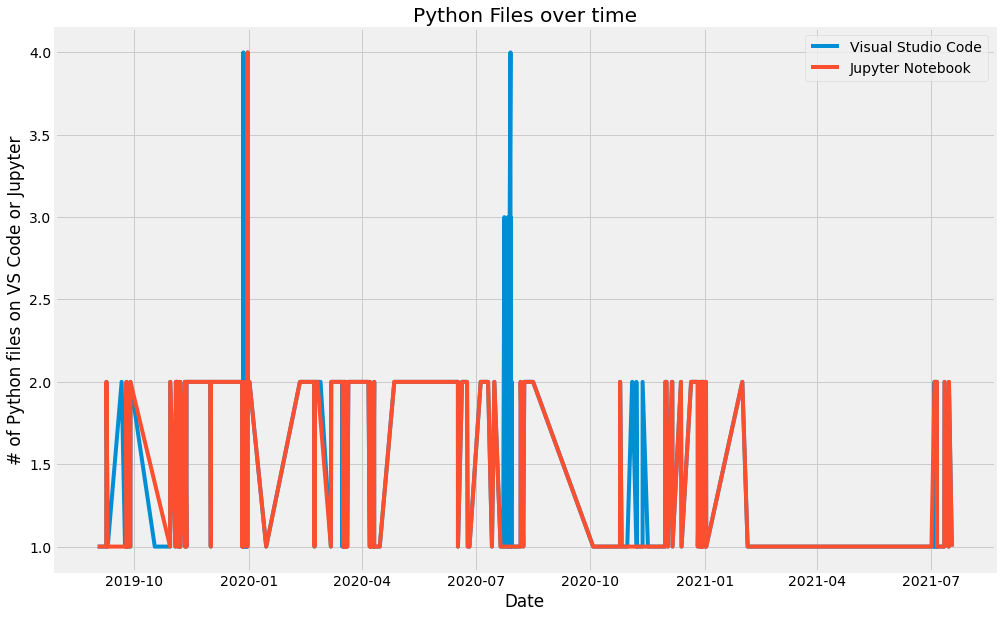

In [292]:
plt.figure(figsize=(15,10))
plt.style.use('fivethirtyeight')
plt.title("Python Files over time")
plt.xlabel("Date")
plt.ylabel('# of Python files on VS Code or Jupyter')
plt.legend(['Visual Studio', 'Jupyter'], loc='upper right')
s = df_python_vs['Date'].value_counts().sort_index()
j = df_python_jupyter_['Date'].value_counts().sort_index()
plt.plot(s, label='Visual Studio Code')
plt.plot(j, label='Jupyter Notebook')
plt.legend()

In [293]:
df_python_jupyter_['File Type'].value_counts(), df_python_vs['File Type'].value_counts()

(Jupyter Notebook    469
 Name: File Type, dtype: int64,
 Jupyter Notebook    469
 Python file         264
 Name: File Type, dtype: int64)

In [294]:
df_python_jupyter_['Date'].value_counts()

2019-12-31 02:54:21    4
2019-12-30 23:40:50    2
2020-12-30 01:28:02    2
2020-03-07 22:31:56    2
2020-12-05 16:17:47    2
                      ..
2020-12-28 22:40:24    1
2020-10-24 17:13:34    1
2021-07-15 07:04:49    1
2019-09-08 16:55:10    1
2021-07-17 19:47:48    1
Name: Date, Length: 301, dtype: int64

In [295]:
df_python_vs['Date'].value_counts()

2020-07-28 22:10:22    4
2019-12-31 02:54:21    4
2020-07-28 21:59:55    4
2019-12-27 17:11:21    4
2019-12-27 16:52:45    4
                      ..
2020-10-10 14:38:25    1
2019-12-26 17:36:20    1
2019-10-17 16:34:16    1
2020-10-17 17:01:55    1
2019-09-23 20:20:32    1
Name: Date, Length: 527, dtype: int64

In [296]:
raw_df['File Type'].value_counts()

                          6624
Javascript                5261
Python file               1085
JSON file                  635
Jupyter Notebook           548
JPG Image file             502
SVG Image file             298
PNG Image file             288
Text document              152
PDF file                    40
Python file (compiled)      14
HTML                        10
Thumbnail                    7
CSS Styling                  6
Icon Image file              4
CSV file                     3
Name: File Type, dtype: int64

In [297]:
raw_df['Date'].value_counts()

10/26/1985 :: 08:15:00    5449
08/26/2018 :: 00:52:52    1576
09/21/2019 :: 02:56:04     536
08/10/2018 :: 02:01:48     411
09/21/2019 :: 02:56:02     390
                          ... 
11/09/2020 :: 10:44:17       1
04/24/2018 :: 11:37:48       1
01/05/2021 :: 22:48:57       1
05/04/2016 :: 17:32:54       1
11/08/2020 :: 09:55:25       1
Name: Date, Length: 2210, dtype: int64

## Sorting by dates

### For Python-Jupyter first

In [298]:
raw_df_filtered_vs_.head()
raw_df_filtered_jupyter_.head()

,File,File Type,Folder Location,Date,Path
9,.Untitled.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,2020-12-05 20:01:10,/Users/brendan/Library/Mobile Documents/com~ap...
10,bokeh_static.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,2021-07-04 01:53:14,/Users/brendan/Library/Mobile Documents/com~ap...
16,bokeh_static-checkpoint.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,2021-07-04 01:53:14,/Users/brendan/Library/Mobile Documents/com~ap...
17,.Untitled-checkpoint.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,2020-12-05 19:53:08,/Users/brendan/Library/Mobile Documents/com~ap...
20,.05 Matplotlib Lecture.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,2020-12-27 14:23:29,/Users/brendan/Library/Mobile Documents/com~ap...


In [299]:
df_python_jupyter_dates = raw_df_filtered_jupyter_[['File', 'File Type', 'Date']]
df_python_vs_dates = raw_df_filtered_vs_[['File', 'File Type', 'Date']]
df_python_jupyter_dates

,File,File Type,Date
9,.Untitled.ipynb,Jupyter Notebook,2020-12-05 20:01:10
10,bokeh_static.ipynb,Jupyter Notebook,2021-07-04 01:53:14
16,bokeh_static-checkpoint.ipynb,Jupyter Notebook,2021-07-04 01:53:14
17,.Untitled-checkpoint.ipynb,Jupyter Notebook,2020-12-05 19:53:08
20,.05 Matplotlib Lecture.ipynb,Jupyter Notebook,2020-12-27 14:23:29
...,...,...,...
7434,.Matrix_capital.ipynb,Jupyter Notebook,2020-08-08 04:22:56
7443,.Coatue-checkpoint.ipynb,Jupyter Notebook,2020-08-08 23:02:20
7444,.Tiger Global-checkpoint.ipynb,Jupyter Notebook,2020-08-16 01:25:32
7445,.Matrix_capital-checkpoint.ipynb,Jupyter Notebook,2020-08-06 00:57:09


In [300]:
df_python_jupyter_dates_sorted = df_python_jupyter_dates.sort_values(by=['Date'])
df_python_vs_dates_sorted = df_python_vs_dates.sort_values(by=['Date'])

df_python_vs_dates_sorted
df_python_jupyter_dates_sorted

,File,File Type,Date
98,.01-NLP (Natural Language Processing) with Pyt...,Jupyter Notebook,2018-08-30 18:54:18
104,.01-Matplotlib Concepts Lecture.ipynb,Jupyter Notebook,2018-08-30 18:54:18
103,.04-Advanced Matplotlib Concepts.ipynb,Jupyter Notebook,2018-08-30 18:54:18
102,.03-Matplotlib Exercises - Solutions.ipynb,Jupyter Notebook,2018-08-30 18:54:18
99,.03-NLP Project - Solutions.ipynb,Jupyter Notebook,2018-08-30 18:54:18
...,...,...,...
5526,goodreads.ipynb,Jupyter Notebook,2021-07-15 07:05:08
422,ISS_sky-checkpoint.ipynb,Jupyter Notebook,2021-07-15 11:44:57
419,ISS_sky.ipynb,Jupyter Notebook,2021-07-15 11:44:57
6639,Untitled-checkpoint.ipynb,Jupyter Notebook,2021-07-17 19:47:48


In [301]:
df_python_jupyter_dates_sorted.set_index('Date')
df_python_vs_dates_sorted.set_index('Date')

,File,File Type
Date,,
2015-03-30 13:51:24,characterCount.py,Python file
2015-03-30 13:51:24,birthdays.py,Python file
2015-03-30 13:51:24,errorExample.py,Python file
2015-03-30 13:51:24,buggyAddingProgram.py,Python file
2015-03-30 13:51:24,coinFlip.py,Python file
...,...,...
2021-07-10 13:35:28,quotes_app.py,Python file
2021-07-11 17:38:28,main.py,Python file
2021-07-17 19:10:12,data.py,Python file


In [302]:
df_python_vs_dates_sorted
df_python_jupyter_dates_sorted

,File,File Type,Date
98,.01-NLP (Natural Language Processing) with Pyt...,Jupyter Notebook,2018-08-30 18:54:18
104,.01-Matplotlib Concepts Lecture.ipynb,Jupyter Notebook,2018-08-30 18:54:18
103,.04-Advanced Matplotlib Concepts.ipynb,Jupyter Notebook,2018-08-30 18:54:18
102,.03-Matplotlib Exercises - Solutions.ipynb,Jupyter Notebook,2018-08-30 18:54:18
99,.03-NLP Project - Solutions.ipynb,Jupyter Notebook,2018-08-30 18:54:18
...,...,...,...
5526,goodreads.ipynb,Jupyter Notebook,2021-07-15 07:05:08
422,ISS_sky-checkpoint.ipynb,Jupyter Notebook,2021-07-15 11:44:57
419,ISS_sky.ipynb,Jupyter Notebook,2021-07-15 11:44:57
6639,Untitled-checkpoint.ipynb,Jupyter Notebook,2021-07-17 19:47:48


In [303]:
# First, reformat the Date variable so it reads month/day/Year
df_python_jupyter_dates_sorted['Date'] = pd.to_datetime(df_python_jupyter_dates_sorted['Date'].dt.strftime('%m/%d/%Y'))
df_python_vs_dates_sorted['Date'] = pd.to_datetime(df_python_vs_dates_sorted['Date'].dt.strftime('%m/%d/%Y'))


In [304]:
# Then call value_counts and convert this to a new DataFrame

df_python_vs_dates_sorted['Date'] = pd.to_datetime(df_python_vs_dates_sorted['Date'].dt.strftime('%m/%d/%Y'))
df_python_vs_dates_sorted_toframe = df_python_vs_dates_sorted['Date'].value_counts().to_frame()

df_python_jupyter_dates_sorted['Date'] = pd.to_datetime(df_python_jupyter_dates_sorted['Date'].dt.strftime('%m/%d/%Y'))
df_python_jupyter_dates_sorted_toframe = df_python_jupyter_dates_sorted['Date'].value_counts().to_frame()


In [305]:
# Then I reset the index and rename the labels
df_jupyter_raw = df_python_jupyter_dates_sorted_toframe.reset_index()
df_vs_raw = df_python_vs_dates_sorted_toframe.reset_index()

In [306]:
# And rename the column labels
df_jupyter = df_jupyter_raw.rename(columns={'index':'Date', 'Date':'Files'})
df_jupyter_output = df_jupyter.sort_values(by='Date')

df_vs = df_vs_raw.rename(columns={'index':'Date', 'Date':'Files'})
df_vs_output = df_vs.sort_values(by='Date')
df_vs_output_ = df_vs_output[df_vs_output['Date'] > '2018-08-27']

In [307]:
# DataFrame to be used for visualization
df_jupyter_output.head()

,Date,Files
0,2018-08-30,69
7,2018-11-14,10
105,2019-09-01,1
46,2019-09-02,3
27,2019-09-07,5


In [308]:
df_vs_output_.head()

,Date,Files
15,2018-09-27,10
7,2018-10-04,14
10,2018-10-05,12
34,2019-09-21,2
33,2019-10-17,2


In [309]:
df_python_jupyter_dates_sorted['Date'] = pd.to_datetime(df_python_jupyter_dates_sorted['Date'].dt.strftime('%m/%d/%Y'))
df_python_jupyter_dates_sorted.head(10)

df_jupyter_dates_frame = df_python_jupyter_dates_sorted['Date'].value_counts().to_frame()
df_jupyter_raw = df_jupyter_dates_frame.reset_index()
df_jupyter_raw

df_jupyter = df_jupyter_raw.rename(columns={'index':'Date', 'Date':'Files'})
df_jupyter_output = df_jupyter.sort_values(by='Date')
df_jupyter_output.head()


,Date,Files
0,2018-08-30,69
7,2018-11-14,10
105,2019-09-01,1
46,2019-09-02,3
27,2019-09-07,5


In [310]:
df_jupyter_output.shape, df_vs_output.shape

((119, 2), (55, 2))

In [311]:
df_jupyter_output.head()
df_vs_output_.head()

,Date,Files
15,2018-09-27,10
7,2018-10-04,14
10,2018-10-05,12
34,2019-09-21,2
33,2019-10-17,2


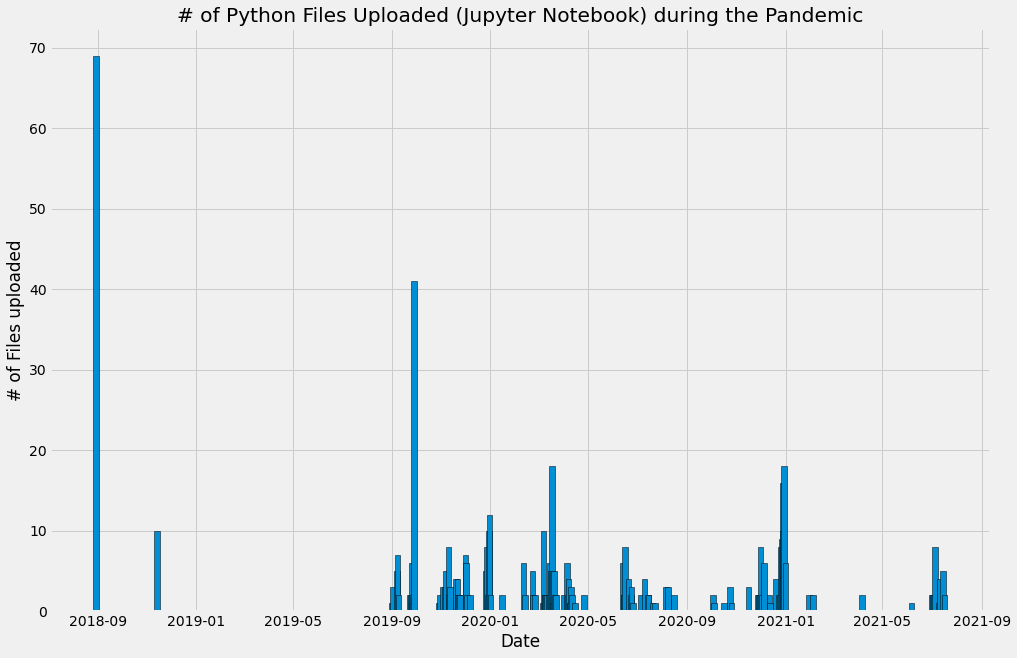

In [312]:
# Graph Jupyter files
fig = plt.figure(figsize=(15,10))
ax = plt.subplot(111)
ax.bar(df_jupyter_output['Date'], df_jupyter_output['Files'], width=7, ec='black')
ax.xaxis_date()

plt.xlabel('Date')
plt.ylabel('# of Files uploaded')
plt.title('# of Python Files Uploaded (Jupyter Notebook) during the Pandemic')
plt.savefig('jupyter_graph.png')
plt.show()


In [313]:
# 


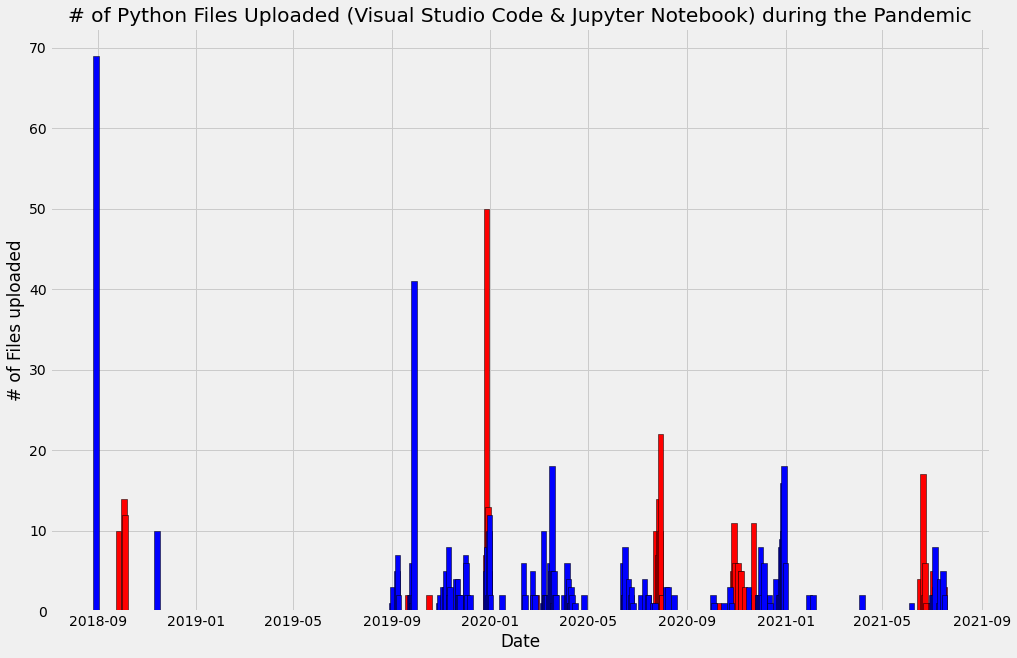

In [314]:
# Combine the two plots
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(15,10))
ax = plt.subplot(111)
ax.bar(df_vs_output_['Date'], df_vs_output_['Files'], width=7, ec='black', color='red')
ax.bar(df_jupyter_output['Date'], df_jupyter_output['Files'], width=7, ec='black', color='blue')
ax.xaxis_date()


plt.xlabel('Date')
plt.ylabel('# of Files uploaded')
plt.title('# of Python Files Uploaded (Visual Studio Code & Jupyter Notebook) during the Pandemic')
plt.savefig('python_graph.png')
plt.show()


In [315]:
# Visual Studio Code - count # of files pre and post 3/12
df_vs_output_.head()
df_vs_output_pre = df_vs_output_.copy()
df_vs_output_pre = df_vs_output_pre[df_vs_output_pre['Date'] <='2020-03-12'] # files pre-COVID
df_vs_output_pre.shape

(12, 2)

In [316]:
df_vs_output_post = df_vs_output_.copy()
df_vs_output_post = df_vs_output_post[df_vs_output_post['Date'] > '2020-03-12']
df_vs_output_post.shape

(38, 2)

In [317]:
# Jupyter Notebook - count # of files pre and post 3/12
df_jupyter.head()
df_jupyter_output_pre = df_jupyter_output.copy()
df_jupyter_output_pre = df_jupyter_output_pre[df_jupyter_output_pre['Date'] <='2020-03-12'] # files pre-COVID
df_jupyter_output_pre.shape

(48, 2)

In [318]:
# Jupyter Notebook - count # of files pre and post 3/12
df_jupyter.head()
df_jupyter_output_post = df_jupyter_output.copy()
df_jupyter_output_post = df_jupyter_output_post[df_jupyter_output_post['Date'] >'2020-03-12'] # files pre-COVID
df_jupyter_output_post.shape

(71, 2)

In [319]:
# 4 dataframes, 1 each for pre and post '3/12/2020' for VS Code and Jupyter Notebook
df_jupyter_output_pre_files = df_jupyter_output_pre['Files'].sum()
df_jupyter_output_post_files = df_jupyter_output_post['Files'].sum()

df_vs_output_pre_files = df_vs_output_pre['Files'].sum()
df_vs_output_post_files = df_vs_output_post['Files'].sum()

print('Jupyter Files, pre 3/12/20210: ', df_jupyter_output_pre_files)
print('Jupyter Files, post 3/12/2020: ', df_jupyter_output_post_files)
print('VS Code Files, pre 3/12/20210: ', df_vs_output_pre_files)
print('VS Code Files, post 3/12/2020: ', df_vs_output_post_files)

Jupyter Files, pre 3/12/20210:  286
Jupyter Files, post 3/12/2020:  262
VS Code Files, pre 3/12/20210:  119
VS Code Files, post 3/12/2020:  181


In [320]:
raw_df_filtered_vs_.head()
raw_df_filtered_jupyter.head()

,File,File Type,Folder Location,Date,Path
9,.Untitled.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,12/05/2020 :: 20:01:10,/Users/brendan/Library/Mobile Documents/com~ap...
10,bokeh_static.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,07/04/2021 :: 01:53:14,/Users/brendan/Library/Mobile Documents/com~ap...
16,bokeh_static-checkpoint.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,07/04/2021 :: 01:53:14,/Users/brendan/Library/Mobile Documents/com~ap...
17,.Untitled-checkpoint.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,12/05/2020 :: 19:53:08,/Users/brendan/Library/Mobile Documents/com~ap...
20,.05 Matplotlib Lecture.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,12/27/2020 :: 14:23:29,/Users/brendan/Library/Mobile Documents/com~ap...


In [321]:
filenames_vs = raw_df_filtered_vs_['Path'].astype(str).to_list()
filenames_jupyter = raw_df_filtered_jupyter['Path'].astype(str).to_list()

In [322]:
len(filenames_vs), len(filenames_jupyter)

(938, 548)

In [323]:
# of lines for VS code
line_count = 0
for file in filenames_vs:
    file_open = open(file)
    for line in file:
        line_count += 1
    file_open.close()
print(line_count)

162425


In [324]:
# of lines for jupyter
line_count = 0
for file in filenames_jupyter:
    file_open = open(file)
    for line in file:
        line_count += 1
    file_open.close()
print(line_count)

99260


In [325]:
# of words for VS

number_of_words = 0
for file in filenames_vs:
    file_open = open(file)
    for line in file:
        words = line.split()
        number_of_words += len(words)
    file_open.close()
print(number_of_words)

158890


In [326]:
# of words for Jupyter

number_of_words = 0
for file in filenames_jupyter:
    file_open = open(file)
    for line in file:
        words = line.split()
        number_of_words += len(words)
    file_open.close()
print(number_of_words)

95430


## Analysis by days of the week

In [376]:
raw_df_filtered_vs_.shape
raw_df_filtered_jupyter.shape

(548, 5)

In [377]:
raw_raw_df_filtered_jupyter

,File,File Type,Folder Location,Date,Path
9,.Untitled.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,12/05/2020 :: 20:01:10,/Users/brendan/Library/Mobile Documents/com~ap...
10,bokeh_static.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,07/04/2021 :: 01:53:14,/Users/brendan/Library/Mobile Documents/com~ap...
16,bokeh_static-checkpoint.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,07/04/2021 :: 01:53:14,/Users/brendan/Library/Mobile Documents/com~ap...
17,.Untitled-checkpoint.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,12/05/2020 :: 19:53:08,/Users/brendan/Library/Mobile Documents/com~ap...
20,.05 Matplotlib Lecture.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,12/27/2020 :: 14:23:29,/Users/brendan/Library/Mobile Documents/com~ap...
...,...,...,...,...,...
7434,.Matrix_capital.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,08/08/2020 :: 04:22:56,/Users/brendan/Library/Mobile Documents/com~ap...
7443,.Coatue-checkpoint.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,08/08/2020 :: 23:02:20,/Users/brendan/Library/Mobile Documents/com~ap...
7444,.Tiger Global-checkpoint.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,08/16/2020 :: 01:25:32,/Users/brendan/Library/Mobile Documents/com~ap...
7445,.Matrix_capital-checkpoint.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,08/06/2020 :: 00:57:09,/Users/brendan/Library/Mobile Documents/com~ap...


In [374]:
raw_df_filtered_vs_.head()

,File,File Type,Folder Location,Date,Path
3,labels.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,labels.py,/Users/brendan/Library/Mobile Documents/com~ap...
4,exercise_8.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,exercise_8.py,/Users/brendan/Library/Mobile Documents/com~ap...
6,widgets_interactive.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,widgets_interactive.py,/Users/brendan/Library/Mobile Documents/com~ap...
7,filtering_glyphs.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,filtering_glyphs.py,/Users/brendan/Library/Mobile Documents/com~ap...
8,widgets.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,widgets.py,/Users/brendan/Library/Mobile Documents/com~ap...


In [375]:
raw_df_filtered_vs_2= raw_df_filtered_vs_[raw_df_filtered_vs_['Date'] >'2018-08-22']
raw_df_filtered_vs_2

,File,File Type,Folder Location,Date,Path
3,labels.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,labels.py,/Users/brendan/Library/Mobile Documents/com~ap...
4,exercise_8.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,exercise_8.py,/Users/brendan/Library/Mobile Documents/com~ap...
6,widgets_interactive.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,widgets_interactive.py,/Users/brendan/Library/Mobile Documents/com~ap...
7,filtering_glyphs.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,filtering_glyphs.py,/Users/brendan/Library/Mobile Documents/com~ap...
8,widgets.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,widgets.py,/Users/brendan/Library/Mobile Documents/com~ap...
...,...,...,...,...,...
8871,conditionals.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,conditionals.py,/Users/brendan/Library/Mobile Documents/com~ap...
8872,tuples_sets.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,tuples_sets.py,/Users/brendan/Library/Mobile Documents/com~ap...
8874,modules.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,modules.py,/Users/brendan/Library/Mobile Documents/com~ap...
8875,classes.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,classes.py,/Users/brendan/Library/Mobile Documents/com~ap...


In [366]:
raw_df_filtered_vs_['Date'].value_counts()

urls.py                          34
settings.py                      27
main.py                          22
models.py                        17
views.py                         17
                                 ..
app_plotting_with_stpyplot.py     1
app_set_page_config.py            1
turtle_spirograph.py              1
ex10.py                           1
myPets.py                         1
Name: Date, Length: 142, dtype: int64

In [367]:
# Jupyter
raw_df_jupyter_date = raw_df_filtered_jupyter[['File', 'Date']]
raw_df_jupyter_date['Date'] = pd.to_datetime(raw_df_jupyter_date["Date"], format = '%m/%d/%Y :: %H:%M:%S')

raw_df_jupyter_date['Day'] = raw_df_jupyter_date['Date'].dt.day_name()
raw_df_jupyter_date.style.set_caption("Jupyter Notebook")

raw_df_jupyter_date.groupby(['Day']).count()


,File,Date
Day,,
Friday,36,36
Monday,67,67
Saturday,113,113
Sunday,80,80
Thursday,103,103
Tuesday,91,91
Wednesday,58,58


In [389]:
raw_df_filtered_vs

,File,File Type,Folder Location,Date,Path
3,labels.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/19/2020 :: 00:13:59,/Users/brendan/Library/Mobile Documents/com~ap...
4,exercise_8.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/22/2020 :: 20:16:56,/Users/brendan/Library/Mobile Documents/com~ap...
6,widgets_interactive.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/18/2020 :: 23:28:45,/Users/brendan/Library/Mobile Documents/com~ap...
7,filtering_glyphs.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/27/2020 :: 23:57:27,/Users/brendan/Library/Mobile Documents/com~ap...
8,widgets.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/18/2020 :: 01:55:44,/Users/brendan/Library/Mobile Documents/com~ap...
...,...,...,...,...,...
8871,conditionals.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,10/05/2018 :: 19:52:13,/Users/brendan/Library/Mobile Documents/com~ap...
8872,tuples_sets.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,10/05/2018 :: 16:26:31,/Users/brendan/Library/Mobile Documents/com~ap...
8874,modules.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,10/05/2018 :: 20:19:33,/Users/brendan/Library/Mobile Documents/com~ap...
8875,classes.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,10/05/2018 :: 20:41:38,/Users/brendan/Library/Mobile Documents/com~ap...


In [395]:
# VS
raw_df_filtered_vs_3 = raw_df_filtered_vs.loc[(raw_df_filtered_vs['Date'] >= '08/22/2019 :: 0:0:0')]
raw_df_filtered_vs_3.shape
raw_df_filtered_vs_3['Date'].value_counts()

09/27/2018 :: 16:20:56    10
08/26/2018 :: 01:11:40     9
08/26/2018 :: 01:31:36     7
08/26/2018 :: 01:28:46     7
08/26/2018 :: 00:51:10     6
                          ..
12/27/2019 :: 00:56:40     1
10/05/2018 :: 19:52:13     1
11/22/2020 :: 14:51:07     1
10/28/2020 :: 12:06:00     1
10/29/2020 :: 11:17:36     1
Name: Date, Length: 158, dtype: int64

In [396]:
# VS
raw_df_vs_date = raw_df_filtered_vs_3[['File', 'Date']]
raw_df_vs_date['Date'] = pd.to_datetime(raw_df_vs_date["Date"], format = '%m/%d/%Y :: %H:%M:%S')

raw_df_vs_date['Day'] = raw_df_vs_date['Date'].dt.day_name()
raw_df_vs_date.style.set_caption("VS Code")

raw_df_vs_date.groupby(['Day']).count()

,File,Date
Day,,
Friday,74,74
Monday,5,5
Saturday,13,13
Sunday,68,68
Thursday,45,45
Tuesday,7,7
Wednesday,10,10


In [327]:
os.getcwd()
os.chdir('/Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science')
df_python_jupyter_dates_sorted

,File,File Type,Date
98,.01-NLP (Natural Language Processing) with Pyt...,Jupyter Notebook,2018-08-30
104,.01-Matplotlib Concepts Lecture.ipynb,Jupyter Notebook,2018-08-30
103,.04-Advanced Matplotlib Concepts.ipynb,Jupyter Notebook,2018-08-30
102,.03-Matplotlib Exercises - Solutions.ipynb,Jupyter Notebook,2018-08-30
99,.03-NLP Project - Solutions.ipynb,Jupyter Notebook,2018-08-30
...,...,...,...
5526,goodreads.ipynb,Jupyter Notebook,2021-07-15
422,ISS_sky-checkpoint.ipynb,Jupyter Notebook,2021-07-15
419,ISS_sky.ipynb,Jupyter Notebook,2021-07-15
6639,Untitled-checkpoint.ipynb,Jupyter Notebook,2021-07-17


In [328]:
# store the filenames as

In [329]:
os.chdir('/Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science')
os.getcwd()
filenames = df_python_jupyter_dates_sorted['Path'].astype(str).to_list()
line_count = 0
for file in filenames:
    file_open = open(file)
    for line in file:
        line_count += 1
    file_open.close()
    

KeyError: 'Path'

In [ ]:
# Graph VS files
fig = plt.figure(figsize=(15,10))
ax = plt.subplot(111)
ax.bar(df_vs_output_['Date'], df_vs_output_['Files'], width=7, ec='black', color='red')
ax.xaxis_date()

plt.xlabel('Date')
plt.ylabel('# of Files uploaded')
plt.title('# of Python Files Uploaded (Visual Studio Code) during the Pandemic')
plt.savefig('vs_graph.png')
plt.show()


In [ ]:
fig = plt.figure(figsize=(15,10))
ax = plt.subplot(111)
ax.bar(df_jupyter_output['Date'], df_jupyter_output['Files'], width=7, ec='black')
ax.xaxis_date()
plt.xlabel('Date')
plt.ylabel('# of Files uploaded')
plt.title('# of Python Files Uploaded to Jupyter Notebook during the Pandemic')
plt.show()

In [ ]:
    # split the date by date and time
# then count frequyency by day

### For Python - VS Code next

In [ ]:
df_python_vs_dates = df_python_vs[['File', 'File Type', 'Date']]
df_python_vs_dates

In [ ]:
df_python_vs_dates_sorted = df_python_vs_dates.sort_values(by=['Date'])
df_python_vs_dates_sorted['Date'] = pd.to_datetime(df_python_vs_dates_sorted['Date'].dt.strftime('%m/%d/%Y'))
df_python_vs_dates_sorted.head(10)

In [ ]:
df_python_vs_dates_sorted['Date'] = pd.to_datetime(df_python_vs_dates_sorted['Date'].dt.strftime('%m/%d/%Y'))
df_python_vs_dates_sorted.head(10)

df_vs_dates_frame = df_python_vs_dates_sorted['Date'].value_counts().to_frame()
#df_jupyter_dates_frame_sorted = df_jupyter_dates_frame.sort_values(by='Date')

#df_vs = df_vs_dates_frame.rename(columns={'index':'Date', 'Date':'Files'})
#df_vs_output = df_vs.sort_values(by='Date')
df_vs_raw = df_vs_dates_frame.reset_index()
df_vs_raw

df_vs = df_vs_raw.rename(columns={'index':'Date', 'Date':'Files'})
df_vs_output = df_vs.sort_values(by='Date')
df_vs_output.head()

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = plt.subplot(111)
ax.bar(df_vs_output['Date'], df_vs_output['Files'], width=7, ec='black', color='red')
ax.xaxis_date()
plt.xlabel('Date')
plt.ylabel('# of Files uploaded')
plt.title('# of Python Files Uploaded to Visual Studio during the Pandemic')
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = plt.subplot(111)
ax.bar(df_jupyter_output['Date'], df_jupyter_output['Files'], width=7, ec='black')
ax.bar(df_vs_output['Date'], df_vs_output['Files'], width=7, ec='black', color='red')
ax.xaxis_date()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xlabel('Date')
plt.xticks(rotation=45, fontsize=8)
plt.ylabel('# of Files uploaded')
plt.title('# of Python Files Uploaded (Daily) during the Pandemic')
plt.legend(['Jupyter', 'Visual Code'])
plt.savefig('python_files.jpg')
plt.show()
